# LINEAR REGRESSION
Importing Liberaries 

Code by Zain Ramzan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score

# Loading Dataset

In [64]:
#Load dataset
data = pd.read_csv(r'C:\Users\zain\OneDrive\Desktop\DATA SCIENCE COURSE\Multiple Linear Regression\advertising.csv')
data.drop('Unnamed: 0', axis=1, inplace=True)
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


# Looking into Dataset

In [65]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [66]:
data.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


In [67]:
data.shape

(200, 4)

In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [69]:
a=data.describe()
print(a)

               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   14.022500
std     85.854236   14.846809   21.778621    5.217457
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   10.375000
50%    149.750000   22.900000   25.750000   12.900000
75%    218.825000   36.525000   45.100000   17.400000
max    296.400000   49.600000  114.000000   27.000000


In [70]:
type(a)

pandas.core.frame.DataFrame

In [71]:
# b=a.get("TV")
# type(b)

In [72]:
# b.get('mean')

In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [74]:
#sns.pairplot??

In [75]:
# scatter plots of each column (X) against sales (Y) using Seaborn
# sns.pairplot(data, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', kind='scatter')
# plt.show()

In [76]:
data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


In [77]:
data.isnull().any()

TV           False
Radio        False
Newspaper    False
Sales        False
dtype: bool

# Scattered Plots for each input variable

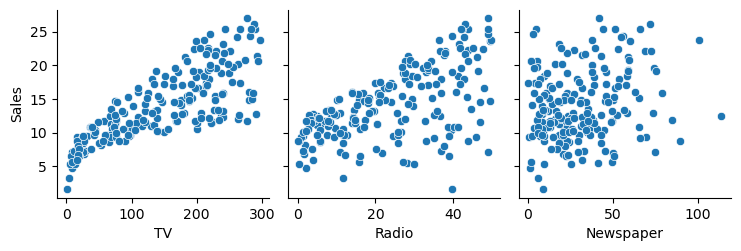

In [78]:
sns.pairplot(data, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', kind='scatter')
plt.show()

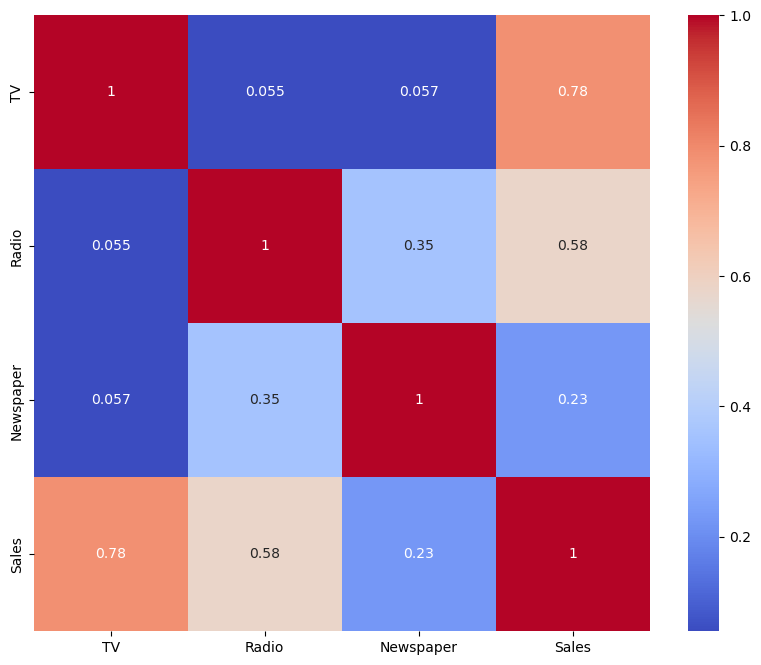

In [79]:
#correlation between different colomns
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', square=True)
#plt.title('Correlation Matrix Heatmap')
plt.show()

# Dataset Preparation for the Multiple linear regression modeling

In [113]:
X=data[['Radio', 'Newspaper']].values.reshape(-1,2)
Y=data['Sales']

In [114]:
X.shape

(200, 2)

In [115]:
X_train, X_test, y_train, y_test=train_test_split(X, Y, test_size=0.3, random_state=100)

In [116]:
X_train.shape

(140, 2)

# Prepare model data point for Visualization

In [117]:
x = X[:,0]
y = X[:,1]
z = Y

x_pred = np.linspace(data['Radio'].min(), data['Radio'].max(), 30)
y_pred = np.linspace(data['Newspaper'].min(), data['Newspaper'].max(), 30)
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

# Training

In [118]:
#create a Multiple Linear Regression model
model=LinearRegression()
model.fit(X, Y)

LinearRegression()

In [119]:
predicted=model.predict(model_viz)
predicted.shape

(900,)

# Prediction on Unseen Data

In [120]:
test_pred = model.predict([[20, 30]])
test_pred

array([13.36913757])

# Prediction on Test Dataset

In [121]:
#Make predictions on the test set
y_pred = model.predict(X_test)
y_pred

array([17.26795039, 16.05136415, 17.79404764, 16.24892065, 16.90675988,
       10.35284933, 12.20534902,  9.92477717, 17.75218934, 18.10769968,
       12.15075453, 16.11105859, 10.52080663, 13.45188105, 11.70973079,
       10.21805678, 16.31477305, 10.97534323, 16.56292841, 12.90876153,
       13.99256741, 10.53143731, 19.03482442, 16.09413945, 13.51502877,
       18.96336692, 16.15656663, 13.44546139, 17.93827323, 16.15825117,
       18.2829375 , 11.04601494, 11.18446635, 12.96171848, 11.62009056,
       14.95603866,  9.68681259, 10.68718251,  9.95271076, 13.28786325,
       14.26907733, 12.27015322, 13.66388634, 10.44581165, 13.16726692,
       11.39665897, 18.48115841, 14.73518055, 12.64471628, 10.01707507,
       13.83757082, 17.34147622, 16.50562924, 17.90004572, 15.1225268 ,
       17.31102527, 10.21495921, 17.01345044, 13.92100678, 16.64227472])

# Evaluation

In [122]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [123]:
print(f'MSE = {round(mse, 2)}')
print(f'R^2 = {round(r2, 2)}')

MSE = 11.57
R^2 = 0.41


In [124]:
fig.suptitle??

# Plotting the 3d plot

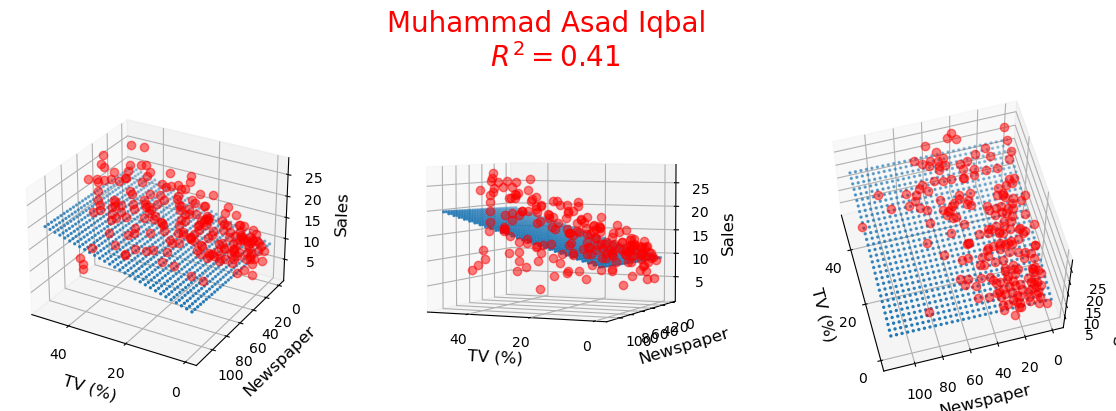

In [125]:
from mpl_toolkits.mplot3d import Axes3D
plt.style.use('default')
fig=plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes=[ax1, ax2, ax3]

for ax in axes:
    ax.plot(x, y, z, color='r', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, s=2)
    ax.set_xlabel('TV (%)', fontsize=12)
    ax.set_ylabel('Newspaper', fontsize=12)
    ax.set_zlabel('Sales', fontsize=12)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')
    
ax1.view_init(elev=28, azim=120)
ax2.view_init(elev=4, azim=114)
ax3.view_init(elev=60, azim=165)

fig.suptitle('Muhammad Asad Iqbal \n $R^2=%.2f$' % r2, fontsize=20, color='r')
fig.tight_layout()

# Evaluation

In [79]:
# #Evaluating the model (Evaluation metrics MSE, R-Squared, SSE etc...)
# mse=mean_squared_error(y_test, y_pred)
# r2=r2_score(y_test, y_pred)

In [80]:
print("Mean Squared Error", mse)
print("R^2 Score", r2)

Mean Squared Error 370.1237853107345
R^2 Score -17.826916243136466


# Plotting